In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance,plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_curve,auc, cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from imblearn.over_sampling import SMOTENC
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import featuretools as ft
import joblib


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

SEED = 1

c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\featuretools\__init__.py:60: FutureWarning: The next non-bugfix release of Featuretools will not support Python 3.6
  FutureWarning


In [ ]:
ls

In [ ]:
# display all data directories
data_path = 'zhuanyezu'

for root, directories, files in os.walk(data_path, topdown=False):
    for name in files:
        print(os.path.join(root, name))

<font color='green'> Now let's look through the dataset by their corresponding directories

In [ ]:
# under "zhuanyezu\train\x_train\aum_train" --> Y月的月末时点资产数据

# load training dataset
aum_m7 = pd.read_csv(r"zhuanyezu\train\x_train\aum_train\aum_m7.csv")
aum_m8 = pd.read_csv(r"zhuanyezu\train\x_train\aum_train\aum_m8.csv")
aum_m9 = pd.read_csv(r"zhuanyezu\train\x_train\aum_train\aum_m9.csv")
display("showing samples from training dataset:")
display(aum_m7.head())

# load test dataset
aum_m10 = pd.read_csv(r"zhuanyezu\train\x_train\aum_train\aum_m10.csv")
aum_m11 = pd.read_csv(r"zhuanyezu\train\x_train\aum_train\aum_m11.csv")
aum_m12 = pd.read_csv(r"zhuanyezu\train\x_train\aum_train\aum_m12.csv")
display("showing samples from test dataset:")
display(aum_m10.head())

In [ ]:
# under "zhuanyezu\train\x_train\behavior_train" --> Y月的行为数据

# load training dataset
behavior_m7 = pd.read_csv(r"zhuanyezu\train\x_train\behavior_train\behavior_m7.csv")
behavior_m8 = pd.read_csv(r"zhuanyezu\train\x_train\behavior_train\behavior_m8.csv")
behavior_m9 = pd.read_csv(r"zhuanyezu\train\x_train\behavior_train\behavior_m9.csv")
display("showing samples from training dataset:")
display(behavior_m7.head())

# load test dataset
behavior_m10 = pd.read_csv(r"zhuanyezu\train\x_train\behavior_train\behavior_m10.csv")
behavior_m11 = pd.read_csv(r"zhuanyezu\train\x_train\behavior_train\behavior_m11.csv")
behavior_m12 = pd.read_csv(r"zhuanyezu\train\x_train\behavior_train\behavior_m12.csv")
display("showing samples from test dataset:")
display(behavior_m10.head())

In [ ]:
# under "zhuanyezu\train\x_train\big_event_train" --> Z季度的客户重大历史数据

# load training dataset
big_event_Q3 = pd.read_csv(r"zhuanyezu\train\x_train\big_event_train\big_event_Q3.csv")
display("showing samples from training dataset:")
display(big_event_Q3.head())

# load test dataset
big_event_Q4 = pd.read_csv(r"zhuanyezu\train\x_train\big_event_train\big_event_Q4.csv")
display("showing samples from test dataset:")
display(big_event_Q4.head())

In [ ]:
# under "zhuanyezu\train\x_train\cunkuan_train" --> 第Y月的存款数据

# load training dataset
cunkuan_m7 = pd.read_csv(r"zhuanyezu\train\x_train\cunkuan_train\cunkuan_m7.csv")
cunkuan_m8 = pd.read_csv(r"zhuanyezu\train\x_train\cunkuan_train\cunkuan_m8.csv")
cunkuan_m9 = pd.read_csv(r"zhuanyezu\train\x_train\cunkuan_train\cunkuan_m9.csv")
display("showing samples from training dataset:")
display(cunkuan_m7.head())

# load test dataset
cunkuan_m10 = pd.read_csv(r"zhuanyezu\train\x_train\cunkuan_train\cunkuan_m10.csv")
cunkuan_m11 = pd.read_csv(r"zhuanyezu\train\x_train\cunkuan_train\cunkuan_m11.csv")
cunkuan_m12 = pd.read_csv(r"zhuanyezu\train\x_train\cunkuan_train\cunkuan_m12.csv")
display("showing samples from test dataset:")
display(cunkuan_m10.head())

In [43]:
# under "zhuanyezu\train\x_train\" --> 代表第Z季度的有效客户,仅有cust_no

# load training dataset
cust_avli_Q3 = pd.read_csv(r"zhuanyezu\train\x_train\cust_avli_Q3.csv")
display("showing samples from training dataset:")
display(cust_avli_Q3.head())

# load test dataset
cust_avli_Q4 = pd.read_csv(r"zhuanyezu\train\x_train\cust_avli_Q4.csv")
display("showing samples from test dataset:")
display(cust_avli_Q4.head())

'showing samples from training dataset:'

,cust_no
0,0xb2d640a6
1,0xb2d4dd44
2,0xb2d69fef
3,0xb2d42c89
4,0xb2d90b58


'showing samples from test dataset:'

,cust_no
0,0xb2d8e1f9
1,0xb2da4f54
2,0xb2d0f4e5
3,0x3b9b3b70
4,0xb2d8d086


In [ ]:
# under "zhuanyezu\train\x_train\" --> 代表第Z季度的客户信息

# load training dataset
cust_info_q3 = pd.read_csv(r"zhuanyezu\train\x_train\cust_info_q3.csv")
display("showing samples from training dataset:")
display(cust_info_q3.head())

# load test dataset
cust_info_q4 = pd.read_csv(r"zhuanyezu\train\x_train\cust_info_q4.csv")
display("showing samples from test dataset:")
display(cust_info_q4.head())

In [ ]:
# y_train
y_train = pd.read_csv(r"zhuanyezu\train\y_train_3\y_Q3_3.csv")
y_train.sample(5)

# Merge dataset

In [ ]:
# merge all training set into x_train by left joining with cust_avli_Q3
x_train = cust_avli_Q3.merge( \
    cust_info_q3, how='left', on="cust_no").merge( \
    big_event_Q3, how='left', on="cust_no").merge( \
    behavior_m7, how='left', on="cust_no").merge( \
    behavior_m8, how='left', on="cust_no", suffixes=('_1st','_2nd')).merge( \
    behavior_m9, how='left', on="cust_no").merge( \
    cunkuan_m7, how='left', on="cust_no").merge( \
    cunkuan_m8, how='left', on="cust_no", suffixes=('_1st','_2nd')).merge( \
    cunkuan_m9, how='left', on="cust_no").merge( \
    aum_m7, how='left', on="cust_no").merge( \
    aum_m8, how='left', on="cust_no", suffixes=('_1st','_2nd')).merge( \
    aum_m9, how='left', on="cust_no")
x_train.head(1)

In [ ]:
# add y_train to the x_train dataset
df_train = x_train.merge(y_train, how="left", on="cust_no")
df_train.head()

In [ ]:
# for df_test
df_test = cust_avli_Q4.merge( \
    cust_info_q4, how='left', on="cust_no").merge( \
    big_event_Q4, how='left', on="cust_no").merge( \
    behavior_m10, how='left', on="cust_no").merge( \
    behavior_m11, how='left', on="cust_no", suffixes=('_1st','_2nd')).merge( \
    behavior_m12, how='left', on="cust_no").merge( \
    cunkuan_m10, how='left', on="cust_no").merge( \
    cunkuan_m11, how='left', on="cust_no", suffixes=('_1st','_2nd')).merge( \
    cunkuan_m12, how='left', on="cust_no").merge( \
    aum_m10, how='left', on="cust_no").merge( \
    aum_m11, how='left', on="cust_no", suffixes=('_1st','_2nd')).merge( \
    aum_m12, how='left', on="cust_no")
df_test.head(1)

In [ ]:
df_train.shape

In [ ]:
df_test.shape

In [ ]:
# save datasets
df_train.to_csv("./artifacts/df_train.csv", encoding='utf_8_sig')
df_test.to_csv("./artifacts/df_test.csv", encoding='utf_8_sig')

# Handling missing values

In [2]:
df_train_0 = pd.read_csv("./artifacts/df_train.csv", encoding='utf_8', index_col=0)
df_test_0 = pd.read_csv("./artifacts/df_test.csv", encoding='utf_8', index_col=0)

c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# split training dataset into train and test, train for tuning hyperparams by cross-validation, test for evaluating performance 
df_train_0, df_val_0 = train_test_split(df_train_0, test_size=0.2, random_state=SEED, shuffle=True, stratify=df_train_0["label"])

<font color='green'> Interestingly that the features "I9" and "E11" has no carried information at all(all null values), for the convenience of analysis, these two features will be droped here

In [4]:
df_train_0 = df_train_0.drop(labels=["I9", "E11", "I12"], axis=1)
df_train_0.head(1)

,cust_no,I1,I2,I3,I4,I5,I6,I7,I8,I10,I11,I13,I14,I15,I16,I17,I18,I19,I20,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E12,E13,E14,E15,E16,E17,E18,B1_1st,B2_1st,B3_1st,B4_1st,B5_1st,B1_2nd,B2_2nd,B3_2nd,B4_2nd,B5_2nd,B1,B2,B3,B4,B5,B6,B7,C1_1st,C2_1st,C1_2nd,C2_2nd,C1,C2,X1_1st,X2_1st,X3_1st,X4_1st,X5_1st,X6_1st,X7_1st,X8_1st,X1_2nd,X2_2nd,X3_2nd,X4_2nd,X5_2nd,X6_2nd,X7_2nd,X8_2nd,X1,X2,X3,X4,X5,X6,X7,X8,label
49499,0xb2d216a4,男性,45,白金,0.0,NaN,0,0,双鱼座,NaN,0.0,NaN,NaN,0,1.0,1,1,1,0,2016-08-16,2016-08-16,2016-08-16,2016-08-17,2016-09-08,2019-03-01,NaN,NaN,NaN,2016-10-18,NaN,2016-10-21,2016-10-26,58000.0,2017-12-14,50000.0,2016-10-21,1.0,0.0,0.0,0.0,0.0,16.0,6.0,319440.48,4.0,212000.0,5,3,227996.74,1,114000.0,2019-09-30 04:52:00,15,507559.52,9.0,504000.0,9.0,508000.0,8.0,507000.0,0.0,559.52,0.0,0.0,0.0,0.0,0.0,504000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,508000,0.0,0.0,0,0.0,0.0,0.0,0,1


In [5]:
df_val_0 = df_val_0.drop(labels=["I9", "E11", "I12"], axis=1)
df_val_0.head(1)

,cust_no,I1,I2,I3,I4,I5,I6,I7,I8,I10,I11,I13,I14,I15,I16,I17,I18,I19,I20,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E12,E13,E14,E15,E16,E17,E18,B1_1st,B2_1st,B3_1st,B4_1st,B5_1st,B1_2nd,B2_2nd,B3_2nd,B4_2nd,B5_2nd,B1,B2,B3,B4,B5,B6,B7,C1_1st,C2_1st,C1_2nd,C2_2nd,C1,C2,X1_1st,X2_1st,X3_1st,X4_1st,X5_1st,X6_1st,X7_1st,X8_1st,X1_2nd,X2_2nd,X3_2nd,X4_2nd,X5_2nd,X6_2nd,X7_2nd,X8_2nd,X1,X2,X3,X4,X5,X6,X7,X8,label
67807,0xb2d07ac7,男性,30,白金,0.0,商业工作人员,0,0,摩羯座,NaN,0.0,NaN,NaN,0,1.0,1,1,0,0,2014-10-29,2018-04-24,2018-04-24,2018-04-24,2018-04-24,2018-12-06,NaN,NaN,NaN,2018-07-31,NaN,NaN,2019-07-27,50000.0,2019-07-27,300000.0,2018-07-23,11.0,6.0,1152862.0,4.0,852857.0,1.0,1.0,502111.11,0.0,0.0,0,0,0.0,0,0.0,2019-08-12 17:24:00,11,809356.91,3.0,811468.02,2.0,811773.09,2.0,800000.0,0.0,9356.91,0.0,0.0,0.0,0.0,0.0,300000.0,0.0,511468.02,0.0,0.0,0.0,0.0,0.0,300000,0.0,511773.09,0,0.0,0.0,0.0,0,1


In [6]:
df_test_0 = df_test_0.drop(labels=["I9", "E11", "I12"], axis=1)
df_test_0.head(1)

,cust_no,I1,I2,I3,I4,I5,I6,I7,I8,I10,I11,I13,I14,I15,I16,I17,I18,I19,I20,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E12,E13,E14,E15,E16,E17,E18,B1_1st,B2_1st,B3_1st,B4_1st,B5_1st,B1_2nd,B2_2nd,B3_2nd,B4_2nd,B5_2nd,B1,B2,B3,B4,B5,B6,B7,C1_1st,C2_1st,C1_2nd,C2_2nd,C1,C2,X1_1st,X2_1st,X3_1st,X4_1st,X5_1st,X6_1st,X7_1st,X8_1st,X1_2nd,X2_2nd,X3_2nd,X4_2nd,X5_2nd,X6_2nd,X7_2nd,X8_2nd,X1,X2,X3,X4,X5,X6,X7,X8
0,0xb2d8e1f9,男性,66,黄金,0.0,办事人员和有关人员,0,0,双子座,NaN,0.0,NaN,NaN,0,1.0,1,1,1,0,2019-07-17,2019-07-17,2019-07-17,2019-07-17,NaN,2019-10-23,NaN,NaN,NaN,2019-10-22,NaN,NaN,NaN,1300.0,2019-10-24,0.0,NaN,1.0,2.0,241376.0,2.0,121300.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,2019-10-29 04:30:00,4,120078.53,2.0,120078.53,2.0,120086.19,2.0,120000.0,0.0,78.53,0.0,0.0,0.0,0.0,0.0,120000.0,0.0,78.53,0.0,0.0,0.0,0.0,0.0,120000,0.0,86.19,0,0.0,0.0,0.0,0


In [7]:
display("The dimension of training dataset is:", df_train_0.shape)
display("The dimension of val dataset is：", df_val_0.shape)
display("The dimension of test dataset is：", df_test_0.shape)

'The dimension of training dataset is:'

(55300, 84)

'The dimension of val dataset is：'

(13826, 84)

'The dimension of test dataset is：'

(76170, 83)

# Feature Engineering

In [23]:
def to_category_or_num(df):
    category_list = ['I1','I3','I5','I8','I10','I13','I14']  
    for ft in df.columns:
        if ft in category_list:
            df[ft] = df[ft].astype('category')
        elif ft == "cust_no":
            df[ft] = df[ft].astype('string')
        else:
            df[ft] = pd.to_numeric(df[ft], errors='coerce')
    return df


def manual_fe(df):
    '''
    Manually perform feature engineering
    '''
    
    # 1. regarding "cust_info_q(Z)" 

    # more missing values in basic info may imply that the seriousness of the account owner when opening the account 
    df['I_missrate'] = df.loc[:,df.columns.str.contains('^I')].isnull().sum(axis=1)/20

    # 2. regarding "cunkuan_m(Y)""

    # miss rate
    df['C_missrate'] = df.loc[:,df.columns.str.contains('C')].isnull().sum(axis=1)/df.loc[:,df.columns.str.contains('C')].shape[1]

    df['C1_divide_C2_fir'] = df.C1_1st/df.C2_1st
    df['C1_divide_C2_sec'] = df.C1_2nd/df.C2_2nd
    df['C1_divide_C2'] = df.C1/df.C2

    df['C1_var'] = np.var(df[['C1_1st','C1_2nd','C1']].fillna(0), axis = 1) 
    df['C2_var'] = np.var(df[['C2_1st','C2_2nd','C2']].fillna(0), axis = 1)
    df['C1_mean'] = np.mean(df[['C1_1st','C1_2nd','C1']].fillna(0), axis = 1)
    df['C2_mean'] = np.mean(df[['C2_1st','C2_2nd','C2']].fillna(0), axis = 1)
    df['C1_incre'] = df.C1 / np.mean(df[['C1_1st','C1_2nd','C1']].fillna(0), axis = 1) - 1 
    df['C2_incre'] = df.C2 / np.mean(df[['C2_1st','C2_2nd','C2']].fillna(0), axis = 1) - 1
    df['C1_std1mean'] = np.std(np.log(df[['C1_1st','C1_2nd','C1']].fillna(0)), axis = 1) + np.mean(np.log(df[['C1_1st','C1_2nd','C1']].fillna(0)), axis = 1)
    df['C2_std1mean'] = np.std(np.log(df[['C2_1st','C2_2nd','C2']].fillna(0)), axis = 1) + np.mean(np.log(df[['C2_1st','C2_2nd','C2']].fillna(0)), axis = 1)
    df['C1_sum_divide_C2_sum'] = np.sum(df[['C1_1st','C1_2nd','C1']].fillna(0), axis = 1) / np.sum(df[['C2_1st','C2_2nd','C2']].fillna(0), axis = 1)
    df['C1_incre_v2'] = df.C1 / np.mean(df[['C1_1st','C1_2nd']].fillna(0), axis = 1) - 1 
    df['C2_incre_v2'] = df.C2 / np.mean(df[['C2_1st','C2_2nd']].fillna(0), axis = 1) - 1

    df['C1_incre_v3'] = df.C1 / df.C1_2nd - 1 
    df['C2_incre_v3'] = df.C2 / df.C2_2nd - 1

    df['C1_incre_v4'] = df.C1_2nd / df.C1_1st - 1 
    df['C2_incre_v4'] = df.C2_2nd / df.C2_1st - 1

    df['C1_incre_mean'] = np.mean(df[['C1_incre_v3','C1_incre_v4']].fillna(0), axis = 1)
    df['C2_incre_mean'] = np.mean(df[['C2_incre_v3','C2_incre_v4']].fillna(0), axis = 1)

    # 3. regarding "aum_m"

    # miss rate
    df['X_missrate'] = df.loc[:,df.columns.str.contains('X')].isnull().sum(axis=1)/df.loc[:,df.columns.str.contains('X')].shape[1]
    # overall
    df['X_sum'] = np.sum(df.loc[:,df.columns.str.contains('X')].fillna(0), axis = 1)
    df['X_var'] = np.var(df.loc[:,df.columns.str.contains('X')].fillna(0), axis = 1)
    df['X_max'] = np.max(df.loc[:,df.columns.str.contains('X')].fillna(0), axis = 1)
    df['X_min'] = np.min(df.loc[:,df.columns.str.contains('X')].fillna(0), axis = 1)
    df['X_median'] = np.median(df.loc[:,df.columns.str.contains('X')].fillna(0), axis = 1)
    # ratio
    df['X1_ratio'] = np.sum(df.loc[:,df.columns.str.contains('X1')].fillna(0), axis = 1) / df['X_sum']
    df['X2_ratio'] = np.sum(df.loc[:,df.columns.str.contains('X2')].fillna(0), axis = 1) / df['X_sum']
    df['X1_ratio'] = np.sum(df.loc[:,df.columns.str.contains('X1')].fillna(0), axis = 1) / df['X_sum']
    df['X3_ratio'] = np.sum(df.loc[:,df.columns.str.contains('X3')].fillna(0), axis = 1) / df['X_sum']
    df['X4_ratio'] = np.sum(df.loc[:,df.columns.str.contains('X4')].fillna(0), axis = 1) / df['X_sum']
    df['X5_ratio'] = np.sum(df.loc[:,df.columns.str.contains('X5')].fillna(0), axis = 1) / df['X_sum']
    df['X6_ratio'] = np.sum(df.loc[:,df.columns.str.contains('X6')].fillna(0), axis = 1) / df['X_sum']
    df['X7_ratio'] = np.sum(df.loc[:,df.columns.str.contains('X7')].fillna(0), axis = 1) / df['X_sum']
    df['X8_ratio'] = np.sum(df.loc[:,df.columns.str.contains('X8')].fillna(0), axis = 1) / df['X_sum']

    df['X2_sum/X3_sum'] = np.sum(df.loc[:,df.columns.str.contains('X2')].fillna(0), axis = 1) / np.sum(df.loc[:,df.columns.str.contains('X3')].fillna(0), axis = 1)
    df['X_invest_ratio'] = np.sum(df[['X4_ratio','X5_ratio','X6_ratio']].fillna(0), axis = 1) 
    df['X_saving_ratio'] = np.sum(df[['X1_ratio','X2_ratio','X3_ratio','X8_ratio']].fillna(0), axis = 1)
    # stats
    # X1
    df['X1_var'] = np.var(df[['X1_1st', 'X1_2nd', 'X1']].fillna(0), axis = 1) 
    df['X1_mean'] = np.mean(df[['X1_1st', 'X1_2nd', 'X1']].fillna(0), axis = 1)
    df['X1_increase'] = df.X1 / np.mean(df[['X1_1st','X1_2nd','X1']].fillna(0), axis = 1) - 1 
    # X2
    df['X2_var'] = np.var(df[['X2_1st','X2_2nd','X2']].fillna(0), axis = 1) #
    df['X2_mean'] = np.mean(df[['X2_1st','X2_2nd','X2']].fillna(0), axis = 1)
    df['X2_increase'] = df.X2 / np.mean(df[['X2_1st','X2_2nd','X2']].fillna(0), axis = 1) - 1 
    # X3
    df['X3_var'] = np.var(df[['X3_1st','X3_2nd','X3']].fillna(0), axis = 1) #
    df['X3_mean'] = np.mean(df[['X3_1st','X3_2nd','X3']].fillna(0), axis = 1)
    df['X3_increase'] = df.X3 / np.mean(df[['X3_1st','X3_2nd','X3']].fillna(0), axis = 1) - 1 #
    # X4
    df['X4_var'] = np.var(df[['X4_1st','X4_2nd','X4']].fillna(0), axis = 1) #
    df['X4_mean'] = np.mean(df[['X4_1st','X4_2nd','X4']].fillna(0), axis = 1)
    df['X4_increase'] = df.X4 / np.mean(df[['X4_1st','X4_2nd','X4']].fillna(0), axis = 1) - 1 #
    # X5
    df['X5_var'] = np.var(df[['X5_1st','X5_2nd','X5']].fillna(0), axis = 1) #
    df['X5_mean'] = np.mean(df[['X5_1st','X5_2nd','X5']].fillna(0), axis = 1)
    df['X5_increase'] = df.X5 / np.mean(df[['X5_1st','X5_2nd','X5']].fillna(0), axis = 1) - 1 
    # X6
    df['X6_var'] = np.var(df[['X6_1st','X6_2nd','X6']].fillna(0), axis = 1) #
    df['X6_mean'] = np.mean(df[['X6_1st','X6_2nd','X6']].fillna(0), axis = 1)
    df['X6_increase'] = df.X6 / np.mean(df[['X6_1st','X6_2nd','X6']].fillna(0), axis = 1) - 1 
    # X7
    df['X7_var'] = np.var(df[['X7_1st','X7_2nd','X7']].fillna(0), axis = 1) #
    df['X7_mean'] = np.mean(df[['X7_1st','X7_2nd','X7']].fillna(0), axis = 1)
    df['X7_increase'] = df.X7 / np.mean(df[['X7_1st','X7_2nd','X7']].fillna(0), axis = 1) - 1 
    # X8
    df['X8_var'] = np.var(df[['X8_1st','X8_2nd','X8']].fillna(0), axis = 1) #
    df['X8_mean'] = np.mean(df[['X8_1st','X8_2nd','X8']].fillna(0), axis = 1)
    df['X8_increase'] = df.X8 / np.mean(df[['X8_1st','X8_2nd','X8']].fillna(0), axis = 1) - 1 

    df['X_1st_sum'] = np.sum(df[['X1_1st','X2_1st','X3_1st','X4_1st','X5_1st','X6_1st','X7_1st','X8_1st']].fillna(0), axis = 1)
    df['X_2nd_sum'] = np.sum(df[['X1_2nd','X2_2nd','X3_2nd','X4_2nd','X5_2nd','X6_2nd','X7_2nd','X8_2nd']].fillna(0), axis = 1)
    df['X_sum'] = np.sum(df[['X1','X2','X3','X4','X5','X6','X7','X8']].fillna(0), axis = 1)

    df['X2_1st/X_1st_sum'] = df.X2_1st / df['X_1st_sum']
    df['X2_2nd/X_2nd_sum'] = df.X2_2nd / df['X_2nd_sum']
    df['X2/X_sum'] = df.X2 / df['X_sum']

    df['X2_1st/X3_1st'] = df.X2_1st / df.X3_1st
    df['X2_sec/X3_2nd'] = df.X2_2nd / df.X3_2nd
    df['X2/X3'] = df.X2 / df.X3

    df['X_invest/X_1st'] = np.sum(df[['X4_1st','X5_1st','X6_1st']].fillna(0), axis = 1) / df['X_1st_sum']
    df['X_invest/X_2nd'] = np.sum(df[['X4_2nd','X5_2nd','X6_2nd']].fillna(0), axis = 1) / df['X_2nd_sum']
    df['X_invest/X'] = np.sum(df[['X4','X5','X6']].fillna(0), axis = 1) / df['X_sum']

    df['X_saving/X_1st'] = np.sum(df[['X1_1st','X2_1st','X3_1st','X8_1st']].fillna(0), axis = 1) / df['X_1st_sum']
    df['X_saving/X_2nd'] = np.sum(df[['X1_2nd','X2_2nd','X3_2nd','X8_2nd']].fillna(0), axis = 1) / df['X_2nd_sum']
    df['X_saving/X'] = np.sum(df[['X1','X2','X3','X8']].fillna(0), axis = 1) / df['X_sum']

    df['X7/X_1st'] = df.X7_1st / df['X_1st_sum']
    df['X7/X_2nd'] = df.X7_2nd / df['X_2nd_sum']
    df['X7/X_sum'] = df.X7 / df['X_sum']

    df['X_var_1st'] = np.var(df[['X1_1st','X2_1st','X3_1st','X4_1st','X5_1st','X6_1st','X7_1st','X8_1st']].fillna(0), axis = 1)
    df['X_var_2nd'] = np.var(df[['X1_2nd','X2_2nd','X3_2nd','X4_2nd','X5_2nd','X6_2nd','X7_2nd','X8_2nd']].fillna(0), axis = 1)
    df['X_var'] = np.var(df[['X1','X2','X3','X4','X5','X6','X7','X8']].fillna(0), axis = 1)

    df['X_fir_tou_sum'] = np.sum(df[['X4_1st','X5_1st','X6_1st']].fillna(0), axis = 1)
    df['X_fir_cun_sum'] = np.sum(df[['X1_1st','X2_1st','X3_1st','X8_1st']].fillna(0), axis = 1)

    df['X_sec_tou_sum'] = np.sum(df[['X4_2nd','X5_2nd','X6_2nd']].fillna(0), axis = 1)
    df['X_sec_cun_sum'] = np.sum(df[['X1_2nd','X2_2nd','X3_2nd','X8_2nd']].fillna(0), axis = 1)

    df['X_tou_sum'] = np.sum(df[['X4','X5','X6']].fillna(0), axis = 1)
    df['X_cun_sum'] = np.sum(df[['X1','X2','X3','X8']].fillna(0), axis = 1)

    df['X_tou_incre'] = df.X_tou_sum / np.mean(df[['X_fir_tou_sum','X_sec_tou_sum']].fillna(0), axis = 1) - 1 
    df['X_tou_incre_v3'] = df.X_tou_sum / df.X_sec_tou_sum - 1 
    df['X_tou_incre_v4'] = df.X_sec_tou_sum / df.X_fir_tou_sum - 1 
    df['X_tou_incre_mean'] = np.mean(df[['X_tou_incre_v3','X_tou_incre_v4']].fillna(0), axis = 1)

    df['X_cun_incre'] = df.X_cun_sum / np.mean(df[['X_fir_cun_sum','X_sec_cun_sum']].fillna(0), axis = 1) - 1 
    df['X_cun_incre_v3'] = df.X_cun_sum / df.X_sec_cun_sum - 1 
    df['X_cun_incre_v4'] = df.X_sec_cun_sum / df.X_fir_cun_sum - 1 
    df['X_cun_incre_mean'] = np.mean(df[['X_cun_incre_v3','X_cun_incre_v4']].fillna(0), axis = 1)

    # 4. regarding "behavior_m" 

    #miss rate
    df['B_missrate'] = df.loc[:,df.columns.str.contains('B')].isnull().sum(axis=1)/df.loc[:,df.columns.str.contains('B')].shape[1]

    # stats
    # B1
    df['B1_variance'] = np.var(df[['B1_1st','B1_2nd','B1']].fillna(0), axis = 1) 
    df['B1_mean'] = np.mean(df[['B1_1st','B1_2nd','B1']].fillna(0), axis = 1)
    df['B1_increase'] = df.B1 / np.mean(df[['B1_1st','B1_2nd','B1']].fillna(0), axis = 1) - 1
    # B2
    df['B2_variance'] = np.var(df[['B2_1st','B2_2nd','B2']].fillna(0), axis = 1) 
    df['B2_mean'] = np.mean(df[['B2_1st','B2_2nd','B2']].fillna(0), axis = 1)
    df['B2_increase'] = df.B2 / np.mean(df[['B2_1st','B2_2nd','B2']].fillna(0), axis = 1) - 1
    # B3
    df['B3_variance'] = np.var(df[['B3_1st','B3_2nd','B3']].fillna(0), axis = 1) 
    df['B3_mean'] = np.mean(df[['B3_1st','B3_2nd','B3']].fillna(0), axis = 1)
    df['B3_increase'] = df.B3 / np.mean(df[['B3_1st','B3_2nd','B3']].fillna(0), axis = 1) - 1
    # B4
    df['B4_variance'] = np.var(df[['B4_1st','B4_2nd','B4']].fillna(0), axis = 1) 
    df['B4_mean'] = np.mean(df[['B4_1st','B4_2nd','B4']].fillna(0), axis = 1)
    df['B4_increase'] = df.B4 / np.mean(df[['B4_1st','B4_2nd','B4']].fillna(0), axis = 1) - 1
    # B5
    df['B5_variance'] = np.var(df[['B5_1st','B5_2nd','B5']].fillna(0), axis = 1) 
    df['B5_mean'] = np.mean(df[['B5_1st','B5_2nd','B5']].fillna(0), axis = 1)
    df['B5_increase'] = df.B5 / np.mean(df[['B5_1st','B5_2nd','B5']].fillna(0), axis = 1) - 1

    # B6
    df['B6_interval'] = (df.B6.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]').max()).map(lambda x:x.days)
    df['B6_hour'] = df.B6.astype('datetime64[ns]').dt.hour
    df['B6_dayofweek'] = df.B6.astype('datetime64[ns]').dt.dayofweek
    df['B6_hour10'] = (df.B6_hour <= 10).astype(int)
    df['B6_hour12'] = (df.B6_hour >= 12).astype(int)
    df['B6_hour14'] = (df.B6_hour >= 14).astype(int)
    df['B6_hour22'] = (df.B6_hour >= 22).astype(int)

    # B7
    df['B7_time_ratio'] = np.sum(df[['B2_1st','B2_2nd','B2','B4_1st','B4_2nd','B4']].fillna(0), axis = 1)/df['B7']
    df['B7_amt_ratio'] = np.sum(df[['B3_1st','B3_2nd','B3','B5_1st','B5_2nd','B5']].fillna(0), axis = 1)/df['B7']

    # interations
    # B2
    df['B2/B1_1st'] = df.B2_1st / df.B1_1st
    df['B2/B1_2nd'] = df.B2_2nd / df.B1_2nd
    df['B2/B1'] = df.B2 / df.B1
    df['B2/B4_1st'] = df.B2_1st / df.B4_1st
    df['B2/B4_2nd'] = df.B2_2nd / df.B4_2nd
    df['B2/B4'] = df.B2 / df.B4
    df['B2B4_1st'] = df.B2_1st + df.B4_1st
    df['B2B4_2nd'] = df.B2_2nd + df.B4_2nd
    df['B2B4'] = df.B2 + df.B4
    df['B2B4_1st/B1_1st'] = df['B2B4_1st'] / df.B1_1st
    df['B2B4_2nd/B1_2nd'] = df['B2B4_2nd'] / df.B1_2nd
    df['B2B4/B1'] = df['B2B4'] / df.B1
    # B3
    df['B3/B2_1st'] = df.B3_1st / df.B2_1st
    df['B3/B2_2nd'] = df.B3_2nd / df.B2_2nd
    df['B3/B2'] = df.B3 / df.B2
    df['B3/B5_1st'] = df.B3_1st / df.B5_1st
    df['B3/B5_2nd'] = df.B3_2nd / df.B5_2nd
    df['B3/B5'] = df.B3 / df.B5
    df['B3B5_1st'] = df.B3_1st + df.B5_1st
    df['B3B5_2nd'] = df.B3_2nd + df.B5_2nd
    df['B3B5'] = df.B3 + df.B5
    # B4
    df['B4/B1_1st'] = df.B4_1st / df.B1_1st
    df['B4/B1_2nd'] = df.B4_2nd / df.B1_2nd
    df['B4/B1'] = df.B4 / df.B1
    # B5
    df['B5/B4_1st'] = df.B5_1st / df.B4_1st
    df['B5/B4_2nd'] = df.B5_2nd / df.B4_2nd
    df['B5/B4'] = df.B5 / df.B4

    # sum of three months
    df['B1_sum'] = np.sum(df[['B1_1st','B1_2nd','B1']].fillna(0), axis = 1)
    df['B2_sum'] = np.sum(df[['B2_1st','B2_2nd','B2']].fillna(0), axis = 1)
    df['B3_sum'] = np.sum(df[['B3_1st','B3_2nd','B3']].fillna(0), axis = 1)
    df['B4_sum'] = np.sum(df[['B4_1st','B4_2nd','B4']].fillna(0), axis = 1)
    df['B5_sum'] = np.sum(df[['B5_1st','B5_2nd','B5']].fillna(0), axis = 1)
    df['B2_sum/B4_sum'] = df['B2_sum'] / df['B4_sum']
    df['B3_sum/B2_sum'] = df['B3_sum'] / df['B2_sum']
    df['B3_sum/B5_sum'] = df['B3_sum'] / df['B5_sum']
    df['B5_sum/B4_sum'] = df['B5_sum'] / df['B4_sum']
    df['B2B4_sum'] = df['B2B4_1st'] + df['B2B4_2nd'] + df['B2B4']
    df['B3B5_sum'] = df['B3B5_1st'] + df['B3B5_2nd'] + df['B3B5']
    df['B2_sum/B1_sum'] = df.B2_sum / df.B1_sum
    df['B4_sum/B1_sum'] = df.B4_sum / df.B1_sum

    # 5. regarding "big_event_Q"

    df['E_missrate'] = df.loc[:,df.columns.str.contains('E')].isnull().sum(axis=1)/df.loc[:,df.columns.str.contains('E')].shape[1]
    # E1
    df['E1_B6_interval'] = (df.E1.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E1_dayofweek'] = df.E1.astype('datetime64[ns]').dt.dayofweek
    # E2
    df['E2_E1_interval'] = (df.E2.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E2_B6_interval'] = (df.E2.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E2_dayofweek'] = df.E2.astype('datetime64[ns]').dt.dayofweek
    # E3
    df['E3_E1_interval'] = (df.E3.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E3_B6_interval'] = (df.E3.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E3_dayofweek'] = df.E3.astype('datetime64[ns]').dt.dayofweek
    # E4
    df['E4_E1_interval'] = (df.E4.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E4_B6_interval'] = (df.E4.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E4_dayofweek'] = df.E4.astype('datetime64[ns]').dt.dayofweek
    # E5
    df['E5_E1_interval'] = (df.E5.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E5_B6_interval'] = (df.E5.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E5_dayofweek'] = df.E5.astype('datetime64[ns]').dt.dayofweek
    # E6
    df['E6_E1_interval'] = (df.E6.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E6_B6_interval'] = (df.E6.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E6_dayofweek'] = df.E6.astype('datetime64[ns]').dt.dayofweek
    # E7
    df['E7_E1_interval'] = (df.E7.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E7_B6_interval'] = (df.E7.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E7_dayofweek'] = df.E7.astype('datetime64[ns]').dt.dayofweek
    # E8
    df['E8_E1_interval'] = (df.E8.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E8_B6_interval'] = (df.E8.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E8_dayofweek'] = df.E8.astype('datetime64[ns]').dt.dayofweek
    # E9
    df['E9_E1_interval'] = (df.E9.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E9_B6_interval'] = (df.E9.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E9_dayofweek'] = df.E9.astype('datetime64[ns]').dt.dayofweek
    # E10
    df['E10_E1_interval'] = (df.E10.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E10_B6_interval'] = (df.E10.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E10_dayofweek'] = df.E10.astype('datetime64[ns]').dt.dayofweek
    # E12
    df['E12_E1_interval'] = (df.E12.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E12_B6_interval'] = (df.E12.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E12_dayofweek'] = df.E12.astype('datetime64[ns]').dt.dayofweek
    # E13
    df['E13_E1_interval'] = (df.E13.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E13_B6_interval'] = (df.E13.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E13_dayofweek'] = df.E13.astype('datetime64[ns]').dt.dayofweek
    # E14
    df['E14_E1_interval'] = (df.E14.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E14_B6_interval'] = (df.E14.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E14_dayofweek'] = df.E14.astype('datetime64[ns]').dt.dayofweek
    # E15
    df['E15_E1_interval'] = (df.E15.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E15_B6_interval'] = (df.E15.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E15_dayofweek'] = df.E15.astype('datetime64[ns]').dt.dayofweek
    # E16
    df['E16_E1_interval'] = (df.E16.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_B6_interval'] = (df.E16.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_dayofweek'] = df.E16.astype('datetime64[ns]').dt.dayofweek
    # E17
    df['E17_E1_interval'] = (df.E17.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E17_B6_interval'] = (df.E17.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E17_dayofweek'] = df.E17.astype('datetime64[ns]').dt.dayofweek
    # E18
    df['E18_E1_interval'] = (df.E18.astype('datetime64[ns]') - df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_B6_interval'] = (df.E18.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_dayofweek'] = df.E18.astype('datetime64[ns]').dt.dayofweek

    #interactions
    df['E15-E17'] = df['E15'] - df['E17']
    df['E15_ratio'] = df['E15']/df['B3B5_sum']
    df['E17_ratio'] = df['E17']/df['B3B5_sum']

    df['E1_B6_interval'] = (df.E1.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E2_B6_interval'] = (df.E2.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E3_B6_interval'] = (df.E3.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E4_B6_interval'] = (df.E4.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E5_B6_interval'] = (df.E5.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E6_B6_interval'] = (df.E6.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E7_B6_interval'] = (df.E7.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E8_B6_interval'] = (df.E8.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E9_B6_interval'] = (df.E9.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E10_B6_interval'] = (df.E10.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E12_B6_interval'] = (df.E12.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E13_B6_interval'] = (df.E13.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E14_B6_interval'] = (df.E14.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_B6_interval'] = (df.E16.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_B6_interval'] = (df.E18.astype('datetime64[ns]') - df.B6.astype('datetime64[ns]')).map(lambda x:x.days)

    df['E1_day'] = pd.to_datetime(df.E1).map(lambda x :x.day)
    df['E2_day'] = pd.to_datetime(df.E2).map(lambda x :x.day)
    df['E3_day'] = pd.to_datetime(df.E3).map(lambda x :x.day)
    df['E4_day'] = pd.to_datetime(df.E4).map(lambda x :x.day)
    df['E5_day'] = pd.to_datetime(df.E5).map(lambda x :x.day)
    df['E6_day'] = pd.to_datetime(df.E6).map(lambda x :x.day)
    df['E7_day'] = pd.to_datetime(df.E7).map(lambda x :x.day)
    df['E8_day'] = pd.to_datetime(df.E8).map(lambda x :x.day)
    df['E9_day'] = pd.to_datetime(df.E9).map(lambda x :x.day)
    df['E10_day'] = pd.to_datetime(df.E10).map(lambda x :x.day)
    df['E12_day'] = pd.to_datetime(df.E12).map(lambda x :x.day)
    df['E13_day'] = pd.to_datetime(df.E13).map(lambda x :x.day)
    df['E14_day'] = pd.to_datetime(df.E14).map(lambda x :x.day)
    df['E16_day'] = pd.to_datetime(df.E16).map(lambda x :x.day)
    df['E18_day'] = pd.to_datetime(df.E18).map(lambda x :x.day)

    df['E1_is_month_end'] = pd.to_datetime(df.E1).map(lambda x :x.is_month_end)
    df['E2_is_month_end'] = pd.to_datetime(df.E2).map(lambda x :x.is_month_end)
    df['E3_is_month_end'] = pd.to_datetime(df.E3).map(lambda x :x.is_month_end)
    df['E4_is_month_end'] = pd.to_datetime(df.E4).map(lambda x :x.is_month_end)
    df['E5_is_month_end'] = pd.to_datetime(df.E5).map(lambda x :x.is_month_end)
    df['E6_is_month_end'] = pd.to_datetime(df.E6).map(lambda x :x.is_month_end)
    df['E7_is_month_end'] = pd.to_datetime(df.E7).map(lambda x :x.is_month_end)
    df['E8_is_month_end'] = pd.to_datetime(df.E8).map(lambda x :x.is_month_end)
    df['E9_is_month_end'] = pd.to_datetime(df.E9).map(lambda x :x.is_month_end)
    df['E10_is_month_end'] = pd.to_datetime(df.E10).map(lambda x :x.is_month_end)
    df['E12_is_month_end'] = pd.to_datetime(df.E12).map(lambda x :x.is_month_end)
    df['E13_is_month_end'] = pd.to_datetime(df.E13).map(lambda x :x.is_month_end)
    df['E14_is_month_end'] = pd.to_datetime(df.E14).map(lambda x :x.is_month_end)
    df['E16_is_month_end'] = pd.to_datetime(df.E16).map(lambda x :x.is_month_end)
    df['E18_is_month_end'] = pd.to_datetime(df.E18).map(lambda x :x.is_month_end)

    df['E6_E5_interval'] = (df.E6.astype('datetime64[ns]') - df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E7_E5_interval'] = (df.E7.astype('datetime64[ns]') - df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E8_E5_interval'] = (df.E8.astype('datetime64[ns]') - df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E9_E5_interval'] = (df.E9.astype('datetime64[ns]') - df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E10_E5_interval'] = (df.E10.astype('datetime64[ns]') - df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E12_E5_interval'] = (df.E12.astype('datetime64[ns]') - df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E13_E5_interval'] = (df.E13.astype('datetime64[ns]') - df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E14_E5_interval'] = (df.E14.astype('datetime64[ns]') - df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_E5_interval'] = (df.E16.astype('datetime64[ns]') - df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_E5_interval'] = (df.E18.astype('datetime64[ns]') - df.E5.astype('datetime64[ns]')).map(lambda x:x.days)

    df['E7_E6_interval'] = (df.E7.astype('datetime64[ns]') - df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E8_E6_interval'] = (df.E8.astype('datetime64[ns]') - df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E9_E6_interval'] = (df.E9.astype('datetime64[ns]') - df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E10_E6_interval'] = (df.E10.astype('datetime64[ns]') - df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E12_E6_interval'] = (df.E12.astype('datetime64[ns]') - df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E13_E6_interval'] = (df.E13.astype('datetime64[ns]') - df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E14_E6_interval'] = (df.E14.astype('datetime64[ns]') - df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_E6_interval'] = (df.E16.astype('datetime64[ns]') - df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_E6_interval'] = (df.E18.astype('datetime64[ns]') - df.E6.astype('datetime64[ns]')).map(lambda x:x.days)

    df['E8_E7_interval'] = (df.E8.astype('datetime64[ns]') - df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E9_E7_interval'] = (df.E9.astype('datetime64[ns]') - df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E10_E7_interval'] = (df.E10.astype('datetime64[ns]') - df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E12_E7_interval'] = (df.E12.astype('datetime64[ns]') - df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E13_E7_interval'] = (df.E13.astype('datetime64[ns]') - df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E14_E7_interval'] = (df.E14.astype('datetime64[ns]') - df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_E7_interval'] = (df.E16.astype('datetime64[ns]') - df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_E7_interval'] = (df.E18.astype('datetime64[ns]') - df.E7.astype('datetime64[ns]')).map(lambda x:x.days)

    df['E9_E8_interval'] = (df.E9.astype('datetime64[ns]') - df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E10_E8_interval'] = (df.E10.astype('datetime64[ns]') - df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E12_E8_interval'] = (df.E12.astype('datetime64[ns]') - df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E13_E8_interval'] = (df.E13.astype('datetime64[ns]') - df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E14_E8_interval'] = (df.E14.astype('datetime64[ns]') - df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_E8_interval'] = (df.E16.astype('datetime64[ns]') - df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_E8_interval'] = (df.E18.astype('datetime64[ns]') - df.E8.astype('datetime64[ns]')).map(lambda x:x.days)

    df['E10_E9_interval'] = (df.E10.astype('datetime64[ns]') - df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E12_E9_interval'] = (df.E12.astype('datetime64[ns]') - df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E13_E9_interval'] = (df.E13.astype('datetime64[ns]') - df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E14_E9_interval'] = (df.E14.astype('datetime64[ns]') - df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_E9_interval'] = (df.E16.astype('datetime64[ns]') - df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_E9_interval'] = (df.E18.astype('datetime64[ns]') - df.E9.astype('datetime64[ns]')).map(lambda x:x.days)

    df['E12_E10_interval'] = (df.E12.astype('datetime64[ns]') - df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E13_E10_interval'] = (df.E13.astype('datetime64[ns]') - df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E14_E10_interval'] = (df.E14.astype('datetime64[ns]') - df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_E10_interval'] = (df.E16.astype('datetime64[ns]') - df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_E10_interval'] = (df.E18.astype('datetime64[ns]') - df.E10.astype('datetime64[ns]')).map(lambda x:x.days)

    df['E13_E12_interval'] = (df.E13.astype('datetime64[ns]') - df.E12.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E14_E12_interval'] = (df.E14.astype('datetime64[ns]') - df.E12.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_E12_interval'] = (df.E16.astype('datetime64[ns]') - df.E12.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_E12_interval'] = (df.E18.astype('datetime64[ns]') - df.E12.astype('datetime64[ns]')).map(lambda x:x.days)

    df['E14_E13_interval'] = (df.E14.astype('datetime64[ns]') - df.E13.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E16_E13_interval'] = (df.E16.astype('datetime64[ns]') - df.E13.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_E13_interval'] = (df.E18.astype('datetime64[ns]') - df.E13.astype('datetime64[ns]')).map(lambda x:x.days)

    df['E16_E14_interval'] = (df.E16.astype('datetime64[ns]') - df.E14.astype('datetime64[ns]')).map(lambda x:x.days)
    df['E18_E14_interval'] = (df.E18.astype('datetime64[ns]') - df.E14.astype('datetime64[ns]')).map(lambda x:x.days)

    df['E18_E16_interval'] = (df.E18.astype('datetime64[ns]') - df.E16.astype('datetime64[ns]')).map(lambda x:x.days)

    # 6. additional
    df['I2_E1_interval'] = df['E1_B6_interval'] / 365  + df['I2'].astype('int')  
    df['I2_E2_interval'] = df['E2_B6_interval'] / 365  + df['I2'].astype('int') 
    df['I2_E3_interval'] = df['E3_B6_interval'] / 365  + df['I2'].astype('int') 
    df['I2_E4_interval'] = df['E4_B6_interval'] / 365  + df['I2'].astype('int') 
    df['I2_E5_interval'] = df['E5_B6_interval'] / 365  + df['I2'].astype('int') 
    df['I2_E6_interval'] = df['E6_B6_interval'] / 365  + df['I2'].astype('int') 
    df['I2_E10_interval'] = df['E10_B6_interval'] / 365  + df['I2'].astype('int') 
    df['I11_B3_sum_ratio'] =  df['B3_sum'] / df['I11'].astype('int') 
    df['I11_B5_sum_ratio'] =  df['B5_sum'] / df['I11'].astype('int') 
    df['C1_E1_interval'] = df['C1'] / df['E1_B6_interval'] 
    df['C1_E2_interval'] = df['C1'] / df['E2_B6_interval'] 
    df['C2_E1_interval'] = df['C2'] / df['E1_B6_interval'] 
    df['C2_E2_interval'] = df['C2'] / df['E2_B6_interval'] 
    df['C1_B3_ratio'] = df['C1'] / df['B3_sum']
    df['C1_B5_ratio'] = df['C1'] / df['B5_sum']
    df['C2_B3_ratio'] = df['C2'] / df['B3_sum']
    df['C2_B5_ratio'] = df['C2'] / df['B5_sum']
    # drop date variables after feature engineering process
    drop_list = ['B6','E1','E2','E3','E4','E5','E6','E7','E8','E9','E10','E12','E13','E14','E16','E18']
    df = df.drop(drop_list, axis=1)
    df = to_category_or_num(df)
    return df


def model_metrics(y, y_pred):
    result = {
        'accuracy_score':accuracy_score(y, y_pred),
        'f1_score_macro': f1_score(y, y_pred, average = "macro"),
        'precision':precision_score(y, y_pred,average="macro"),
        'recall':recall_score(y, y_pred,average="macro"),
        'kappa': cohen_kappa_score(y, y_pred)
    }
    return result


def get_feature_importance(df_train):
    y = df_train[df_train.notnull()].label
    x = df_train[df_train.label.notnull()].drop(['cust_no','label'],axis=1)
    # set base model
    model = LGBMClassifier(
        task = "training",
        boosting_type = 'gbdt', 
        num_iterations = 100,
        class_weight = 'balanced',
        importance_type = 'split', 
        objective = 'multi:softprob',
        learning_rate = 0.01, 
        num_leaves =31, 
        num_threads = 6,
        seed = SEED, 
        silent = False, 
        verbose = 1, # display training info
        device_type = 'gpu',
    )
    # train model
    model.fit(x, y)
    plot_importance(model, max_num_features=50, figsize=(10,20),importance_type='gain')
    plt.show()
    feature_importance = pd.DataFrame({
        'feature': model.booster_.feature_name(),
        'gain': model.booster_.feature_importance('gain'),
        'split': model.booster_.feature_importance('split')

    }).sort_values('split',ascending=False)
    # display(feature_importance[feature_importance.gain>0].values)
    
    return model,feature_importance

def fine_fe(df):
    # get the most 20 important features for further finer feature engineering
    top_20 = set(feature_importance_0.sort_values('split', ascending=False)[0:20].sort_values('feature',ascending=True).feature.values)
    # remove Horoscopes as it is not very explainable
    rmlist = set(['I8'])
    top_20 = list(top_20 - rmlist)
    top_20.append('cust_no')
    expanded_df = df[top_20]
    # build es entity
    es = ft.EntitySet(id='dfs')
    es.entity_from_dataframe(entity_id='expanded_df',        
                 dataframe=expanded_df,
                 index='cust_no')
    # generate more interactive features using featuretool
    features_matrix,feature_names = ft.dfs(
        entityset=es,
        target_entity='expanded_df',
        trans_primitives=["divide_numeric",'multiply_numeric'],
        max_depth=2,
        n_jobs=6,
        verbose=True)
    top_20.remove('cust_no')
    # cust_info + ft generated features
    features_matrix = features_matrix.drop(top_20, axis=1)
    # feature_matrix includes both the initial features + featuretool generated features
    features_matrix = df.merge(features_matrix, how='left', on='cust_no')
    return features_matrix

In [9]:
df_train_1 = manual_fe(df_train_0)
display("The dim of df_train after manual feature engineering:", df_train_1.shape)
df_val_1 = manual_fe(df_val_0)
display("The dim of df_val after manual feature engineering:", df_val_1.shape)
df_test_1 = manual_fe(df_test_0)
display("The dim of df_test after manual feature engineering:", df_test_1.shape)

c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


'The dim of df_train after manual feature engineering:'

(55300, 385)

c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


'The dim of df_val after manual feature engineering:'

(13826, 385)

c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


'The dim of df_test after manual feature engineering:'

(76170, 384)

c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 70855
[LightGBM] [Info] Number of data points in the train set: 55300, number of used features: 373
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 205 dense feature groups (10.97 MB) transferred to GPU in 0.010448 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


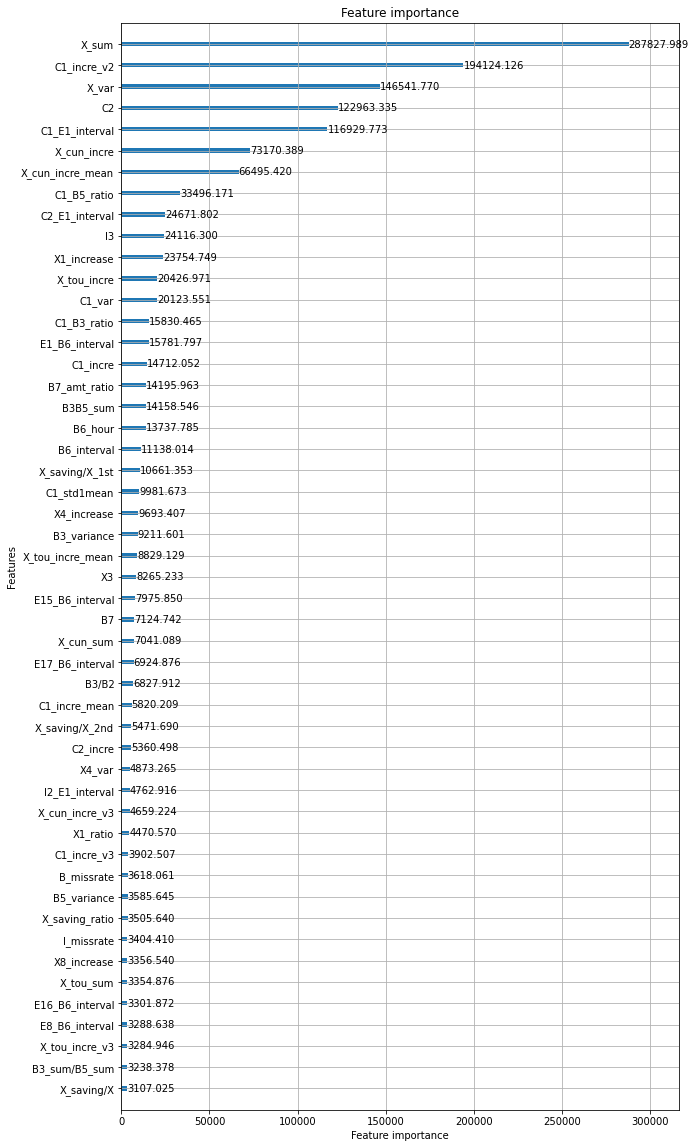

In [10]:
# plot feature importance on these initial features
_,feature_importance_0 = get_feature_importance(df_train_1)

In [11]:
# proceed with finer feature engineering
df_train_2 = fine_fe(df_train_1)
df_val_2 = fine_fe(df_val_1)
df_test_2 = fine_fe(df_test_1)

Built 533 features
EntitySet scattered to 6 workers in 3 seconds                                                                          
Elapsed: 00:03 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████
Built 533 features
EntitySet scattered to 6 workers in 3 seconds                                                                          
Elapsed: 00:02 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████
Built 533 features
EntitySet scattered to 6 workers in 3 seconds                                                                          
Elapsed: 00:04 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [12]:
df_train_2.shape

(55300, 898)

In [13]:
df_val_2.shape

(13826, 898)

In [14]:
df_test_2.shape

(76170, 897)

c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 201367
[LightGBM] [Info] Number of data points in the train set: 55300, number of used features: 886
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 573 dense feature groups (30.38 MB) transferred to GPU in 0.017256 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


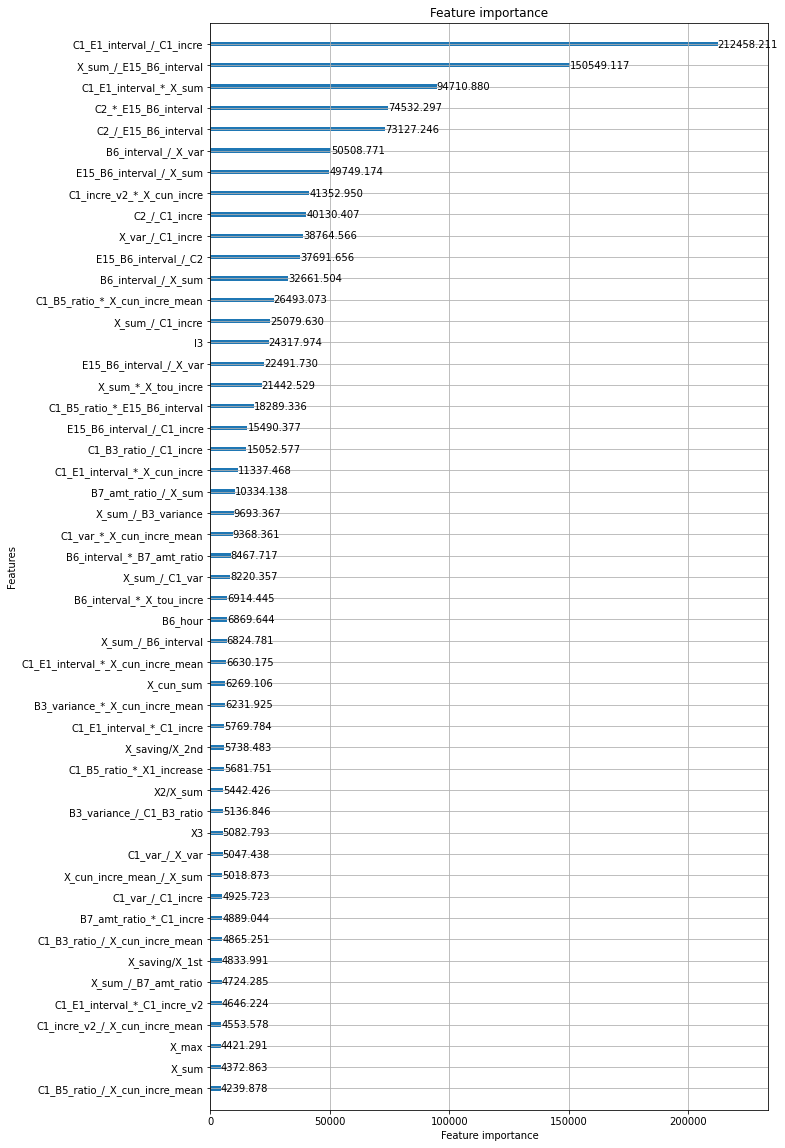

In [15]:
# check the feature importance after finishing all feature engineering process
_,feature_importance1 = get_feature_importance(df_train_2)

In [16]:
# pick the all features as the final features
new_features = list(feature_importance1.sort_values("gain", ascending=False).sort_values('feature',ascending=True).feature.values)
final_features = []
for i in new_features:
    final_features.append(i.replace('_*_',' * ').replace('_/_',' / '))
final_features.append('cust_no')

In [17]:
len(final_features)

897

In [18]:
df_train = df_train_2[final_features + ["label"]]
df_train.head(1)

,B1,B1_1st,B1_2nd,B1_increase,B1_mean,B1_sum,B1_variance,B2,B2/B1,B2/B1_1st,B2/B1_2nd,B2/B4,B2/B4_1st,B2/B4_2nd,B2B4,B2B4/B1,B2B4_1st,B2B4_1st/B1_1st,B2B4_2nd,B2B4_2nd/B1_2nd,B2B4_sum,B2_1st,B2_2nd,B2_increase,B2_mean,B2_sum,B2_sum/B1_sum,B2_sum/B4_sum,B2_variance,B3,B3/B2,B3/B2_1st,B3/B2_2nd,B3/B5,B3/B5_1st,B3/B5_2nd,B3B5,B3B5_1st,B3B5_2nd,B3B5_sum,B3_1st,B3_2nd,B3_increase,B3_mean,B3_sum,B3_sum/B2_sum,B3_sum/B5_sum,B3_variance,B3_variance * B6_interval,B3_variance * B7_amt_ratio,B3_variance * C1_B3_ratio,B3_variance * C1_B5_ratio,B3_variance * C1_E1_interval,B3_variance * C1_incre,B3_variance * C1_incre_v2,B3_variance * C1_var,B3_variance * C2,B3_variance * E15_B6_interval,B3_variance * X1_increase,B3_variance * X4_increase,B3_variance * X4_var,B3_variance * X_cun_incre,B3_variance * X_cun_incre_mean,B3_variance * X_sum,B3_variance * X_tou_incre,B3_variance * X_var,B3_variance / B6_interval,B3_variance / B7_amt_ratio,B3_variance / C1_B3_ratio,B3_variance / C1_B5_ratio,B3_variance / C1_E1_interval,B3_variance / C1_incre,B3_variance / C1_incre_v2,B3_variance / C1_var,B3_variance / C2,B3_variance / E15_B6_interval,B3_variance / X1_increase,B3_variance / X4_increase,B3_variance / X4_var,B3_variance / X_cun_incre,B3_variance / X_cun_incre_mean,B3_variance / X_sum,B3_variance / X_tou_incre,B3_variance / X_var,B4,B4/B1,B4/B1_1st,B4/B1_2nd,B4_1st,B4_2nd,B4_increase,B4_mean,B4_sum,B4_sum/B1_sum,B4_variance,B5,B5/B4,B5/B4_1st,B5/B4_2nd,B5_1st,B5_2nd,B5_increase,B5_mean,B5_sum,B5_sum/B4_sum,B5_variance,B6_dayofweek,B6_hour,B6_hour10,B6_hour12,B6_hour14,B6_hour22,B6_interval,B6_interval * B7_amt_ratio,B6_interval * C1_B3_ratio,B6_interval * C1_B5_ratio,B6_interval * C1_E1_interval,B6_interval * C1_incre,B6_interval * C1_incre_v2,B6_interval * C1_var,B6_interval * C2,B6_interval * E15_B6_interval,B6_interval * X1_increase,B6_interval * X4_increase,B6_interval * X4_var,B6_interval * X_cun_incre,B6_interval * X_cun_incre_mean,B6_interval * X_sum,B6_interval * X_tou_incre,B6_interval * X_var,B6_interval / B3_variance,B6_interval / B7_amt_ratio,B6_interval / C1_B3_ratio,B6_interval / C1_B5_ratio,B6_interval / C1_E1_interval,B6_interval / C1_incre,B6_interval / C1_incre_v2,B6_interval / C1_var,B6_interval / C2,B6_interval / E15_B6_interval,B6_interval / X1_increase,B6_interval / X4_increase,B6_interval / X4_var,B6_interval / X_cun_incre,B6_interval / X_cun_incre_mean,B6_interval / X_sum,B6_interval / X_tou_incre,B6_interval / X_var,B7,B7_amt_ratio,B7_amt_ratio * C1_B3_ratio,B7_amt_ratio * C1_B5_ratio,B7_amt_ratio * C1_E1_interval,B7_amt_ratio * C1_incre,B7_amt_ratio * C1_incre_v2,B7_amt_ratio * C1_var,B7_amt_ratio * C2,B7_amt_ratio * E15_B6_interval,B7_amt_ratio * X1_increase,B7_amt_ratio * X4_increase,B7_amt_ratio * X4_var,B7_amt_ratio * X_cun_incre,B7_amt_ratio * X_cun_incre_mean,B7_amt_ratio * X_sum,B7_amt_ratio * X_tou_incre,B7_amt_ratio * X_var,B7_amt_ratio / B3_variance,B7_amt_ratio / B6_interval,B7_amt_ratio / C1_B3_ratio,B7_amt_ratio / C1_B5_ratio,B7_amt_ratio / C1_E1_interval,B7_amt_ratio / C1_incre,B7_amt_ratio / C1_incre_v2,B7_amt_ratio / C1_var,B7_amt_ratio / C2,B7_amt_ratio / E15_B6_interval,B7_amt_ratio / X1_increase,B7_amt_ratio / X4_increase,B7_amt_ratio / X4_var,B7_amt_ratio / X_cun_incre,B7_amt_ratio / X_cun_incre_mean,B7_amt_ratio / X_sum,B7_amt_ratio / X_tou_incre,B7_amt_ratio / X_var,B7_time_ratio,B_missrate,C1,C1_1st,C1_2nd,C1_B3_ratio,C1_B3_ratio * C1_B5_ratio,C1_B3_ratio * C1_E1_interval,C1_B3_ratio * C1_incre,C1_B3_ratio * C1_incre_v2,C1_B3_ratio * C1_var,C1_B3_ratio * C2,C1_B3_ratio * E15_B6_interval,C1_B3_ratio * X1_increase,C1_B3_ratio * X4_increase,C1_B3_ratio * X4_var,C1_B3_ratio * X_cun_incre,C1_B3_ratio * X_cun_incre_mean,C1_B3_ratio * X_sum,C1_B3_ratio * X_tou_incre,C1_B3_ratio * X_var,C1_B3_ratio / B3_variance,C1_B3_ratio / B6_interval,C1_B3_ratio / B7_amt_ratio,C1_B3_ratio / C1_B5_ratio,C1_B3_ratio / C1_E1_interval,C1_B3_ratio / C1_incre,C1_B3_ratio / C1_incre_v2,C1_B3_ratio / C1_var,C1_B3_ratio / C2,C1_B3_r

In [19]:
# drop the row with all na values
df_train = df_train.dropna(how='all')

In [20]:
df_val = df_val_2[final_features + ["label"]]
display(df_val.head(1))

df_test = df_test_2[final_features]
display(df_test.head(1))

,B1,B1_1st,B1_2nd,B1_increase,B1_mean,B1_sum,B1_variance,B2,B2/B1,B2/B1_1st,B2/B1_2nd,B2/B4,B2/B4_1st,B2/B4_2nd,B2B4,B2B4/B1,B2B4_1st,B2B4_1st/B1_1st,B2B4_2nd,B2B4_2nd/B1_2nd,B2B4_sum,B2_1st,B2_2nd,B2_increase,B2_mean,B2_sum,B2_sum/B1_sum,B2_sum/B4_sum,B2_variance,B3,B3/B2,B3/B2_1st,B3/B2_2nd,B3/B5,B3/B5_1st,B3/B5_2nd,B3B5,B3B5_1st,B3B5_2nd,B3B5_sum,B3_1st,B3_2nd,B3_increase,B3_mean,B3_sum,B3_sum/B2_sum,B3_sum/B5_sum,B3_variance,B3_variance * B6_interval,B3_variance * B7_amt_ratio,B3_variance * C1_B3_ratio,B3_variance * C1_B5_ratio,B3_variance * C1_E1_interval,B3_variance * C1_incre,B3_variance * C1_incre_v2,B3_variance * C1_var,B3_variance * C2,B3_variance * E15_B6_interval,B3_variance * X1_increase,B3_variance * X4_increase,B3_variance * X4_var,B3_variance * X_cun_incre,B3_variance * X_cun_incre_mean,B3_variance * X_sum,B3_variance * X_tou_incre,B3_variance * X_var,B3_variance / B6_interval,B3_variance / B7_amt_ratio,B3_variance / C1_B3_ratio,B3_variance / C1_B5_ratio,B3_variance / C1_E1_interval,B3_variance / C1_incre,B3_variance / C1_incre_v2,B3_variance / C1_var,B3_variance / C2,B3_variance / E15_B6_interval,B3_variance / X1_increase,B3_variance / X4_increase,B3_variance / X4_var,B3_variance / X_cun_incre,B3_variance / X_cun_incre_mean,B3_variance / X_sum,B3_variance / X_tou_incre,B3_variance / X_var,B4,B4/B1,B4/B1_1st,B4/B1_2nd,B4_1st,B4_2nd,B4_increase,B4_mean,B4_sum,B4_sum/B1_sum,B4_variance,B5,B5/B4,B5/B4_1st,B5/B4_2nd,B5_1st,B5_2nd,B5_increase,B5_mean,B5_sum,B5_sum/B4_sum,B5_variance,B6_dayofweek,B6_hour,B6_hour10,B6_hour12,B6_hour14,B6_hour22,B6_interval,B6_interval * B7_amt_ratio,B6_interval * C1_B3_ratio,B6_interval * C1_B5_ratio,B6_interval * C1_E1_interval,B6_interval * C1_incre,B6_interval * C1_incre_v2,B6_interval * C1_var,B6_interval * C2,B6_interval * E15_B6_interval,B6_interval * X1_increase,B6_interval * X4_increase,B6_interval * X4_var,B6_interval * X_cun_incre,B6_interval * X_cun_incre_mean,B6_interval * X_sum,B6_interval * X_tou_incre,B6_interval * X_var,B6_interval / B3_variance,B6_interval / B7_amt_ratio,B6_interval / C1_B3_ratio,B6_interval / C1_B5_ratio,B6_interval / C1_E1_interval,B6_interval / C1_incre,B6_interval / C1_incre_v2,B6_interval / C1_var,B6_interval / C2,B6_interval / E15_B6_interval,B6_interval / X1_increase,B6_interval / X4_increase,B6_interval / X4_var,B6_interval / X_cun_incre,B6_interval / X_cun_incre_mean,B6_interval / X_sum,B6_interval / X_tou_incre,B6_interval / X_var,B7,B7_amt_ratio,B7_amt_ratio * C1_B3_ratio,B7_amt_ratio * C1_B5_ratio,B7_amt_ratio * C1_E1_interval,B7_amt_ratio * C1_incre,B7_amt_ratio * C1_incre_v2,B7_amt_ratio * C1_var,B7_amt_ratio * C2,B7_amt_ratio * E15_B6_interval,B7_amt_ratio * X1_increase,B7_amt_ratio * X4_increase,B7_amt_ratio * X4_var,B7_amt_ratio * X_cun_incre,B7_amt_ratio * X_cun_incre_mean,B7_amt_ratio * X_sum,B7_amt_ratio * X_tou_incre,B7_amt_ratio * X_var,B7_amt_ratio / B3_variance,B7_amt_ratio / B6_interval,B7_amt_ratio / C1_B3_ratio,B7_amt_ratio / C1_B5_ratio,B7_amt_ratio / C1_E1_interval,B7_amt_ratio / C1_incre,B7_amt_ratio / C1_incre_v2,B7_amt_ratio / C1_var,B7_amt_ratio / C2,B7_amt_ratio / E15_B6_interval,B7_amt_ratio / X1_increase,B7_amt_ratio / X4_increase,B7_amt_ratio / X4_var,B7_amt_ratio / X_cun_incre,B7_amt_ratio / X_cun_incre_mean,B7_amt_ratio / X_sum,B7_amt_ratio / X_tou_incre,B7_amt_ratio / X_var,B7_time_ratio,B_missrate,C1,C1_1st,C1_2nd,C1_B3_ratio,C1_B3_ratio * C1_B5_ratio,C1_B3_ratio * C1_E1_interval,C1_B3_ratio * C1_incre,C1_B3_ratio * C1_incre_v2,C1_B3_ratio * C1_var,C1_B3_ratio * C2,C1_B3_ratio * E15_B6_interval,C1_B3_ratio * X1_increase,C1_B3_ratio * X4_increase,C1_B3_ratio * X4_var,C1_B3_ratio * X_cun_incre,C1_B3_ratio * X_cun_incre_mean,C1_B3_ratio * X_sum,C1_B3_ratio * X_tou_incre,C1_B3_ratio * X_var,C1_B3_ratio / B3_variance,C1_B3_ratio / B6_interval,C1_B3_ratio / B7_amt_ratio,C1_B3_ratio / C1_B5_ratio,C1_B3_ratio / C1_E1_interval,C1_B3_ratio / C1_incre,C1_B3_ratio / C1_incre_v2,C1_B3_ratio / C1_var,C1_B3_ratio / C2,C1_B3_r

,B1,B1_1st,B1_2nd,B1_increase,B1_mean,B1_sum,B1_variance,B2,B2/B1,B2/B1_1st,B2/B1_2nd,B2/B4,B2/B4_1st,B2/B4_2nd,B2B4,B2B4/B1,B2B4_1st,B2B4_1st/B1_1st,B2B4_2nd,B2B4_2nd/B1_2nd,B2B4_sum,B2_1st,B2_2nd,B2_increase,B2_mean,B2_sum,B2_sum/B1_sum,B2_sum/B4_sum,B2_variance,B3,B3/B2,B3/B2_1st,B3/B2_2nd,B3/B5,B3/B5_1st,B3/B5_2nd,B3B5,B3B5_1st,B3B5_2nd,B3B5_sum,B3_1st,B3_2nd,B3_increase,B3_mean,B3_sum,B3_sum/B2_sum,B3_sum/B5_sum,B3_variance,B3_variance * B6_interval,B3_variance * B7_amt_ratio,B3_variance * C1_B3_ratio,B3_variance * C1_B5_ratio,B3_variance * C1_E1_interval,B3_variance * C1_incre,B3_variance * C1_incre_v2,B3_variance * C1_var,B3_variance * C2,B3_variance * E15_B6_interval,B3_variance * X1_increase,B3_variance * X4_increase,B3_variance * X4_var,B3_variance * X_cun_incre,B3_variance * X_cun_incre_mean,B3_variance * X_sum,B3_variance * X_tou_incre,B3_variance * X_var,B3_variance / B6_interval,B3_variance / B7_amt_ratio,B3_variance / C1_B3_ratio,B3_variance / C1_B5_ratio,B3_variance / C1_E1_interval,B3_variance / C1_incre,B3_variance / C1_incre_v2,B3_variance / C1_var,B3_variance / C2,B3_variance / E15_B6_interval,B3_variance / X1_increase,B3_variance / X4_increase,B3_variance / X4_var,B3_variance / X_cun_incre,B3_variance / X_cun_incre_mean,B3_variance / X_sum,B3_variance / X_tou_incre,B3_variance / X_var,B4,B4/B1,B4/B1_1st,B4/B1_2nd,B4_1st,B4_2nd,B4_increase,B4_mean,B4_sum,B4_sum/B1_sum,B4_variance,B5,B5/B4,B5/B4_1st,B5/B4_2nd,B5_1st,B5_2nd,B5_increase,B5_mean,B5_sum,B5_sum/B4_sum,B5_variance,B6_dayofweek,B6_hour,B6_hour10,B6_hour12,B6_hour14,B6_hour22,B6_interval,B6_interval * B7_amt_ratio,B6_interval * C1_B3_ratio,B6_interval * C1_B5_ratio,B6_interval * C1_E1_interval,B6_interval * C1_incre,B6_interval * C1_incre_v2,B6_interval * C1_var,B6_interval * C2,B6_interval * E15_B6_interval,B6_interval * X1_increase,B6_interval * X4_increase,B6_interval * X4_var,B6_interval * X_cun_incre,B6_interval * X_cun_incre_mean,B6_interval * X_sum,B6_interval * X_tou_incre,B6_interval * X_var,B6_interval / B3_variance,B6_interval / B7_amt_ratio,B6_interval / C1_B3_ratio,B6_interval / C1_B5_ratio,B6_interval / C1_E1_interval,B6_interval / C1_incre,B6_interval / C1_incre_v2,B6_interval / C1_var,B6_interval / C2,B6_interval / E15_B6_interval,B6_interval / X1_increase,B6_interval / X4_increase,B6_interval / X4_var,B6_interval / X_cun_incre,B6_interval / X_cun_incre_mean,B6_interval / X_sum,B6_interval / X_tou_incre,B6_interval / X_var,B7,B7_amt_ratio,B7_amt_ratio * C1_B3_ratio,B7_amt_ratio * C1_B5_ratio,B7_amt_ratio * C1_E1_interval,B7_amt_ratio * C1_incre,B7_amt_ratio * C1_incre_v2,B7_amt_ratio * C1_var,B7_amt_ratio * C2,B7_amt_ratio * E15_B6_interval,B7_amt_ratio * X1_increase,B7_amt_ratio * X4_increase,B7_amt_ratio * X4_var,B7_amt_ratio * X_cun_incre,B7_amt_ratio * X_cun_incre_mean,B7_amt_ratio * X_sum,B7_amt_ratio * X_tou_incre,B7_amt_ratio * X_var,B7_amt_ratio / B3_variance,B7_amt_ratio / B6_interval,B7_amt_ratio / C1_B3_ratio,B7_amt_ratio / C1_B5_ratio,B7_amt_ratio / C1_E1_interval,B7_amt_ratio / C1_incre,B7_amt_ratio / C1_incre_v2,B7_amt_ratio / C1_var,B7_amt_ratio / C2,B7_amt_ratio / E15_B6_interval,B7_amt_ratio / X1_increase,B7_amt_ratio / X4_increase,B7_amt_ratio / X4_var,B7_amt_ratio / X_cun_incre,B7_amt_ratio / X_cun_incre_mean,B7_amt_ratio / X_sum,B7_amt_ratio / X_tou_incre,B7_amt_ratio / X_var,B7_time_ratio,B_missrate,C1,C1_1st,C1_2nd,C1_B3_ratio,C1_B3_ratio * C1_B5_ratio,C1_B3_ratio * C1_E1_interval,C1_B3_ratio * C1_incre,C1_B3_ratio * C1_incre_v2,C1_B3_ratio * C1_var,C1_B3_ratio * C2,C1_B3_ratio * E15_B6_interval,C1_B3_ratio * X1_increase,C1_B3_ratio * X4_increase,C1_B3_ratio * X4_var,C1_B3_ratio * X_cun_incre,C1_B3_ratio * X_cun_incre_mean,C1_B3_ratio * X_sum,C1_B3_ratio * X_tou_incre,C1_B3_ratio * X_var,C1_B3_ratio / B3_variance,C1_B3_ratio / B6_interval,C1_B3_ratio / B7_amt_ratio,C1_B3_ratio / C1_B5_ratio,C1_B3_ratio / C1_E1_interval,C1_B3_ratio / C1_incre,C1_B3_ratio / C1_incre_v2,C1_B3_ratio / C1_var,C1_B3_ratio / C2,C1_B3_r

In [22]:
df_val.shape

(13826, 898)

In [24]:
df_train.to_csv("./artifacts/df_train_processed_rev7.csv", encoding='utf_8_sig') 
df_val.to_csv("./artifacts/df_val_processed_rev7.csv", encoding='utf_8_sig') 
df_test.to_csv("./artifacts/df_test_processed_rev7.csv", encoding='utf_8_sig') 

In [3]:
def to_category_or_num(df):
    category_list = ['I1','I3','I5','I8','I10','I13','I14']  
    for ft in df.columns:
        if ft in category_list:
            df[ft] = df[ft].astype('category')
        elif ft == "cust_no":
            df[ft] = df[ft].astype('string')
        else:
            df[ft] = pd.to_numeric(df[ft], errors='coerce')
    return df

In [4]:
df_train = to_category_or_num(pd.read_csv("./artifacts/df_train_processed_rev7.csv", encoding='utf_8', index_col=0, low_memory=False))
df_val = to_category_or_num(pd.read_csv("./artifacts/df_val_processed_rev7.csv", encoding='utf_8', index_col=0, low_memory=False))
df_test = to_category_or_num(pd.read_csv("./artifacts/df_test_processed_rev7.csv", encoding='utf_8', index_col=0, low_memory=False))

# Upsampling to address unbalanced dataset issue

In [ ]:
"""
# tried smote for umsampling, but the result doesnt seem to be as good as expected
X = df_train[df_train.label.notnull()].drop(['cust_no','label'],axis=1)
# drop the row with all na values
X = X.dropna(how='all')
y = df_train[df_train.label.notnull()].label

# check all the categorical variables inside the dataset
display(list(set(X.columns.tolist()).intersection(['I1','I3','I5','I8','I10','I13','I14'])))

feature_names = X.columns.tolist()

feature_names.remove('I3')
feature_names.remove('I5')
#feature_names.remove('I10')
#feature_names.remove('I13')

#feature_names.extend(["I10", "I13", "I3", "I5"])
feature_names.extend(["I3", "I5"])

# impute inf values
X = X.replace([np.inf, -np.inf], np.nan)

numeric_transformer = SimpleImputer(missing_values=np.nan, strategy='median')

categorical_transformer = SimpleImputer(strategy='most_frequent')

impute = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
])

X_imputed = impute.fit_transform(X, y)

X_imputed = pd.DataFrame(data=X_imputed, columns=feature_names)

# impute.fit will convert all dtype to "object"
X_imputed = to_category_or_num(X_imputed)

# declare smote object
sm = SMOTENC(
    categorical_features=[698, 699],
    sampling_strategy='not majority',
    random_state=SEED,
    k_neighbors=6,
    n_jobs=6)

X_res, y_res = sm.fit_resample(X_imputed, y)

# adjust back the column sequence
X_res = X_res[X.columns.tolist()]
"""

# Hyperparameter tuning

In [258]:
'''
params =  {
    'num_class': 3,
    'metric': 'multi_logloss',
    'device_type': 'gpu',
    #"bagging_freq": 10, #bagging every 10 iter
    #"bagging_fraction": 0.8, # speed up training, mitigate overfitting

}

# 1. tune 'max_depth' with "num_leaves"
# * It is necessary to tune num_leaves with the max_depth together.
param_grid = {
    "num_leaves": [40, 120, 200],
    "max_depth": [6, 8], # rule of thumb: num_leaves = 2^(max_depth)
}

# build default estimator
est = LGBMClassifier(
    boosting_type='gbdt', 
    num_leaves=40, 
    max_depth=6, 
    learning_rate=0.1, 
    n_estimators=100, 
    subsample_for_bin=200000, 
    objective='multiclass', 
    class_weight=None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=1.0, 
    subsample_freq=0, 
    colsample_bytree=1.0, 
    #reg_alpha = 0.001,
    #reg_lambda = 8, 
    random_state=SEED, 
    n_jobs=8, 
    silent=True, 
    # importance_type='gain', 
    **params    
    )

clf = GridSearchCV(estimator=est, param_grid=param_grid, cv=3, scoring="f1_weighted")
clf.fit(train_x, train_y)

print('best param:{0}'.format(clf.best_params_))
print('best score:{0}'.format(clf.best_score_))
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['params'])

# 2. tune 'subsample', "feature_fraction", "bagging_fraction" 
param_grid = {
    'subsample': [0.6, 0.8],
    "feature_fraction": [0.4, 0.6, 0.8],
}

# build default estimator
est = LGBMClassifier(
    boosting_type='gbdt', 
    num_leaves=200, 
    max_depth=8, 
    learning_rate=0.1, 
    n_estimators=100, 
    subsample_for_bin=200000, 
    objective='multiclass', 
    class_weight=None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=1.0, 
    subsample_freq=0, 
    colsample_bytree=1.0, 
    #reg_alpha = 0.001,
    #reg_lambda = 8, 
    random_state=SEED, 
    n_jobs=8, 
    silent=True, 
    # importance_type='gain', 
    **params    
    )

clf = GridSearchCV(estimator=est, param_grid=param_grid, cv=3, scoring="f1_weighted")
clf.fit(train_x, train_y)

print('best param:{0}'.format(clf.best_params_))
print('best score:{0}'.format(clf.best_score_))
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['params'])

# 3. tune "min_data_in_leaf" and "learning rate"
params =  {
    'num_class': 3,
    'metric': 'multi_logloss',
    'device_type': 'gpu',
    #"bagging_freq": 10, #bagging every 10 iter
    #"bagging_fraction": 0.8, # speed up training, mitigate overfitting
    'feature_fraction': 0.8, 
    'subsample': 0.8,
}

param_grid = {
    'min_data_in_leaf': [15, 20],
    "learning_rate": [0.1, 0.01, 0.001]
    #'lambda_l1': [0.1, 1],
    #'lambda_l2': [0.1, 1],
}

# build default estimator
est = LGBMClassifier(
    boosting_type='gbdt', 
    num_leaves=200, 
    max_depth=8, 
    learning_rate=0.1, 
    n_estimators=100, 
    subsample_for_bin=200000, 
    objective='multiclass', 
    class_weight=None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    subsample_freq=0, # disable bagging
    random_state=SEED, 
    n_jobs=8, 
    silent=True, 
    **params    
    )

clf = GridSearchCV(estimator=est, param_grid=param_grid, cv=3, scoring="f1_weighted")
clf.fit(train_x, train_y)

print('best param:{0}'.format(clf.best_params_))
print('best score:{0}'.format(clf.best_score_))
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['params'])
'''

'\nparams =  {\n    \'num_class\': 3,\n    \'metric\': \'multi_logloss\',\n    \'device_type\': \'gpu\',\n    #"bagging_freq": 10, #bagging every 10 iter\n    #"bagging_fraction": 0.8, # speed up training, mitigate overfitting\n\n}\n\n# 1. tune \'max_depth\' with "num_leaves"\n# * It is necessary to tune num_leaves with the max_depth together.\nparam_grid = {\n    "num_leaves": [40, 120, 200],\n    "max_depth": [6, 8], # rule of thumb: num_leaves = 2^(max_depth)\n}\n\n# build default estimator\nest = LGBMClassifier(\n    boosting_type=\'gbdt\', \n    num_leaves=40, \n    max_depth=6, \n    learning_rate=0.1, \n    n_estimators=100, \n    subsample_for_bin=200000, \n    objective=\'multiclass\', \n    class_weight=None, \n    min_split_gain=0.0, \n    min_child_weight=0.001, \n    min_child_samples=20, \n    subsample=1.0, \n    subsample_freq=0, \n    colsample_bytree=1.0, \n    #reg_alpha = 0.001,\n    #reg_lambda = 8, \n    random_state=SEED, \n    n_jobs=8, \n    silent=True, \n    

In [9]:
# Smote
# train_X, val_X, train_y, val_y = train_test_split(X_res, y_res, test_size=0.2, random_state=SEED, shuffle=True, stratify=y_res)

# Non-Smote
X = df_train[df_train.label.notnull()].drop(['cust_no','label'],axis=1)
# drop the row with all na values
X = X.dropna(how='all')
y = df_train[df_train.label.notnull()].label

In [10]:
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

In [11]:
train_X, val_X, train_y, val_y = train_test_split(X, y_encoded, test_size=0.2, random_state=SEED, shuffle=True, stratify=y_encoded)

In [12]:
'''
# tried with combined set of hyperparams
params =  {
    'num_class': 3,
    'metric': 'multi_logloss',
    'device_type': 'gpu',
    #"bagging_freq": 10, #bagging every 10 iter
    #"bagging_fraction": 0.8, # speed up training, mitigate overfitting
    'feature_fraction': 0.8, 
    'subsample': 0.8,
    "max_bin": 150
}

param_grid = {
    'min_data_in_leaf': [10, 15],
    #"learning_rate": [0.1, 0.005],
    #'lambda_l1': [0.1, 0.3],
    #'num_leaves': [200, 400],
    #'max_depth': [6, 8],
    #"max_bin": [255, 500],
}

# build default estimator
est = LGBMClassifier(
    boosting_type='gbdt', 
    learning_rate=0.1,
    #n_estimators=200, 
    n_estimators=30, 
    max_depth=8,
    num_leaves=400,
    lambda_l1=0.1,
    subsample_for_bin=200000, 
    objective='multiclass', 
    class_weight="balanced", 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    subsample_freq=0, # disable bagging
    random_state=SEED, 
    n_jobs=4, 
    silent=False, 
    **params    
    )

kappa_scorer = make_scorer(cohen_kappa_score)

clf = GridSearchCV(estimator=est, param_grid=param_grid, scoring=kappa_scorer, cv=3)
clf.fit(X, y)

print('best param:{0}'.format(clf.best_params_))
print('best score:{0}'.format(clf.best_score_))
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['params'])
'''

'\n# tried with combined set of hyperparams\nparams =  {\n    \'num_class\': 3,\n    \'metric\': \'multi_logloss\',\n    \'device_type\': \'gpu\',\n    #"bagging_freq": 10, #bagging every 10 iter\n    #"bagging_fraction": 0.8, # speed up training, mitigate overfitting\n    \'feature_fraction\': 0.8, \n    \'subsample\': 0.8,\n    "max_bin": 150\n}\n\nparam_grid = {\n    \'min_data_in_leaf\': [10, 15],\n    #"learning_rate": [0.1, 0.005],\n    #\'lambda_l1\': [0.1, 0.3],\n    #\'num_leaves\': [200, 400],\n    #\'max_depth\': [6, 8],\n    #"max_bin": [255, 500],\n}\n\n# build default estimator\nest = LGBMClassifier(\n    boosting_type=\'gbdt\', \n    learning_rate=0.1,\n    #n_estimators=200, \n    n_estimators=30, \n    max_depth=8,\n    num_leaves=400,\n    lambda_l1=0.1,\n    subsample_for_bin=200000, \n    objective=\'multiclass\', \n    class_weight="balanced", \n    min_split_gain=0.0, \n    min_child_weight=0.001, \n    subsample_freq=0, # disable bagging\n    random_state=SEED, \

# Train model

In [13]:
'''
params =  {
    "objective": "multiclass",
    'num_class': 3,
    "boosting_type": "gbdt",
    'metric': 'multi_logloss',
    'device_type': 'gpu',
    "num_leaves": 30,
    "max_depth": 3,
    "learning_rate": 0.01,
    'feature_fraction': 0.4, 
    "bagging_fraction": 0.4, 
    #'subsample': 0.2,
    "min_data_in_leaf": 30, 
    "max_bin": 30,
    # dart mode only
    #"extra_trees":True,
    #"drop_rate":0.2, 
    #"max_drop":50, 
    #"skip_drop":0.3, 
}


train_set = lgb.Dataset(data=X, label=y_encoded, categorical_feature="auto")

lgb.cv(params, train_set=train_set, nfold=3, num_boost_round=100, stratified=True, shuffle=True, early_stopping_rounds=10, verbose_eval=True, seed=SEED, eval_train_metric=True)
'''

'\nparams =  {\n    "objective": "multiclass",\n    \'num_class\': 3,\n    "boosting_type": "gbdt",\n    \'metric\': \'multi_logloss\',\n    \'device_type\': \'gpu\',\n    "num_leaves": 30,\n    "max_depth": 3,\n    "learning_rate": 0.01,\n    \'feature_fraction\': 0.4, \n    "bagging_fraction": 0.4, \n    #\'subsample\': 0.2,\n    "min_data_in_leaf": 30, \n    "max_bin": 30,\n    # dart mode only\n    #"extra_trees":True,\n    #"drop_rate":0.2, \n    #"max_drop":50, \n    #"skip_drop":0.3, \n}\n\n\ntrain_set = lgb.Dataset(data=X, label=y_encoded, categorical_feature="auto")\n\nlgb.cv(params, train_set=train_set, nfold=3, num_boost_round=100, stratified=True, shuffle=True, early_stopping_rounds=10, verbose_eval=True, seed=SEED, eval_train_metric=True)\n'

In [14]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_y),
                                                 train_y)
display("the suggested classweights for label 0, 1, 2 :", class_weights)

c:\users\yangk\anaconda3\envs\xtrain\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1 2], y=[2 2 2 ... 1 2 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


'the suggested classweights for label 0, 1, 2 :'

array([2.16290212, 1.53100775, 0.53064652])

In [29]:
params =  {
    'num_class': 3,
    'metric': 'multi_logloss',
    'device_type': 'gpu',
    'feature_fraction': 0.2, 
    "bagging_fraction": 0.8, 
    #'subsample': 0.2,
    "min_data_in_leaf": 13, 
    "max_bin": 128,
    ####################
    # "dart" mode only 
    #"extra_trees":True,
    #"drop_rate":0.2, 
    #"max_drop":50, 
    #"skip_drop":0.3, 
    ####################
}

In [30]:
final_model = lgb.LGBMClassifier(
    boosting_type='gbdt', 
    #boosting_type='dart', # tried with dart mode 
    num_leaves=1000, 
    max_depth=10, 
    n_estimators=13000, 
    #subsample_for_bin=200000, 
    objective='multiclass', 
    #class_weight={0:2.8, 1:1.7, 2:0.4},  # "balanced" mode seems not working very well
    class_weight='balanced',
    min_split_gain=0.37158177312975155, 
    min_child_weight=0.0003913820436320165, # the No. of samples in a child node * weight
    bagging_freq=5, # disable bagging 
    reg_alpha=0.25916787591548507,
    reg_lambda=0.17013352667143534,
    learning_rate=0.001,
    #reg_alpha=0.1, 
    #reg_lambda=0.1, 
    random_state=SEED, 
    importance_type='split',
    n_jobs=6, 
    silent=True, 
    **params    
    )

In [48]:
# model training
#final_model.fit(X=train_X, y=train_y, eval_names=["training", "eval"], eval_set=[(train_X, train_y), (val_X, val_y)], early_stopping_rounds=20, categorical_feature="auto")
final_model.fit(X=X, y=y_encoded, categorical_feature="auto")

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, class_weight='balanced',
               device_type='gpu', feature_fraction=0.2, learning_rate=0.001,
               max_bin=128, max_depth=10, metric='multi_logloss',
               min_child_weight=0.0003913820436320165, min_data_in_leaf=13,
               min_split_gain=0.37158177312975155, n_estimators=10000, n_jobs=6,
               num_class=3, num_leaves=1000, objective='multiclass',
               random_state=1, reg_alpha=0.25916787591548507,
               reg_lambda=0.17013352667143533)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

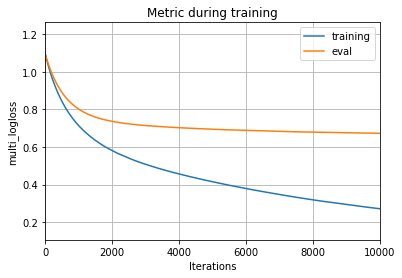

In [32]:
lgb.plot_metric(final_model)

# Model evaluation 

In [20]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y_true))-0.5)
    plt.ylim(len(np.unique(y_true))-0.5, -0.5)
    return ax

In [50]:
# check with train set
kappa_train = model_metrics(y_encoded, final_model.predict(X))
kappa_train

{'accuracy_score': 0.9290235081374322,
 'f1_score_macro': 0.9215250149231323,
 'precision': 0.9025577612428729,
 'recall': 0.9448263979515051,
 'kappa': 0.8716346063392846}

In [49]:
# check with val set
X_val = df_val.drop(['cust_no','label'],axis=1)
y_val = df_val.label

kappa_val = model_metrics(le.transform(y_val), final_model.predict(X_val))

# code for model with no label encoder
# kappa_val = model_metrics(y_val, final_model.predict(X_val))

kappa_val

{'accuracy_score': 0.7058440619123391,
 'f1_score_macro': 0.6468258099429303,
 'precision': 0.6398568634140943,
 'recall': 0.6579212706600349,
 'kappa': 0.470660842546733}

Confusion matrix, without normalization
[[1356  431  344]
 [ 372 1704  934]
 [ 496 1490 6699]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

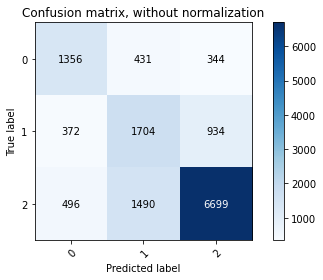

In [66]:
# visualize confusion matrix 
plot_confusion_matrix(le.transform(y_val), final_model.predict(X_val), classes=np.unique(le.transform(y_val)))

In [51]:
# save model
joblib.dump(final_model, r'.\artifacts\model\lgb_rev7.pkl')

['.\\artifacts\\model\\lgb_rev7.pkl']

# Model inference

In [52]:
# load model
final_model = joblib.load(r'.\artifacts\model\lgb_rev7.pkl')

In [53]:
X_test = df_test.drop(['cust_no'],axis=1)

In [54]:
y_test_pred = final_model.predict(X_test)

In [55]:
# convert back to the original labels
y_test_pred = pd.Series(le.inverse_transform(y_test_pred), name="label") 

In [61]:
y_test_pred[0:20]

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     1
9     1
10   -1
11    1
12    1
13    1
14    1
15    0
16    0
17    1
18    1
19    1
Name: label, dtype: int64

In [62]:
y_Q4_4 = pd.concat([cust_avli_Q4, pd.DataFrame(y_test_pred)], axis=1)

In [63]:
y_Q4_4.shape

(76170, 2)

In [64]:
cust_avli_Q4.shape

(76170, 1)

In [65]:
# save the predictions for submission
y_Q4_4.to_csv(r".\artifacts\y_train_4\y_Q4_4_rev7.csv")

# Reference

- smote oversampling: https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html
- lightGBM: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
- Hyperparams tuning: https://zhuanlan.zhihu.com/p/76206257
- Hyperparams tuning: https://neptune.ai/blog/lightgbm-parameters-guide
- Hyperparasms tuning: https://www.cxyzjd.com/article/qq_35679701/107239487
- kappa: https://zhuanlan.zhihu.com/p/67844308
- feature engineering reference: https://github.com/aialgorithm/Blog/blob/master/projects/%E5%AE%A2%E6%88%B7%E6%B5%81%E5%A4%B1%E9%A2%84%E6%B5%8B%E5%8F%8A%E8%90%A5%E9%94%80/11.features_analysis_v1.ipynb